<a href="https://colab.research.google.com/github/jonathanjohnson8/jonnet/blob/first_branch/FirstLinearNN_OriginML_Akshay_JJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import torch.nn as nn

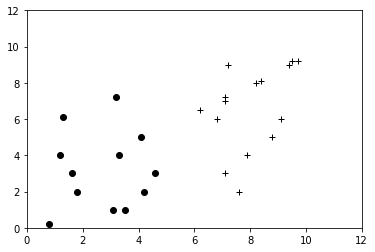

In [ ]:
pointsA = np.array([[0.8, 0.2],[1.6, 3],[3.1, 1],[4.6, 3],[1.2, 4],[3.5, 1],[4.2, 2],[1.8, 2],[3.3, 4],[4.1, 5],[1.3, 6.1],[3.2, 7.2]], dtype=np.float32)
pointsB = np.array([[6.2, 6.5],[7.1, 7.2],[8.4, 8.1],[9.5, 9.2],[9.7, 9.2],[7.6, 2],[7.1, 3],[7.9, 4],[7.2, 9],[8.8, 5],[9.1, 6],[6.8, 6],[7.1, 7],[8.2, 8],[9.4, 9]], dtype=np.float32)

plt.plot(pointsA[:,0], pointsA[:,1], 'o', color='black');
plt.plot(pointsB[:,0], pointsB[:,1], '+', color='black');
plt.xlim(0,12); plt.ylim(0,12);
plt.show();

used a linear function to be able to draw a linear classification boundary

In [ ]:
model = nn.Linear(2, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

tensors are slopes (ax + by + c = 0 )
0.5939x + -.1929y + (model.bias) = 0

In [ ]:
model.weight

Parameter containing:
tensor([[ 0.5939, -0.1929]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-0.0872], requires_grad=True)

y = -ax - c / b
y = -(ax + c)/ b

#first boundary doesnt work. See ugly picture below

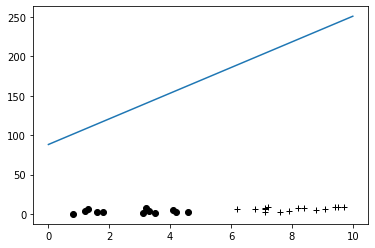

In [ ]:
with torch.no_grad():
  x = np.linspace(0,10,100)
  y = ((model.weight[0,0] * x - model.bias))/ model.weight[0,1]
plt.plot(x,y)
plt.plot(pointsA[:,0], pointsA[:,1], 'o', color='black');
plt.plot(pointsB[:,0], pointsB[:,1], '+', color='black');




Now , we will adjust weights to minimize error (costs) == fancy version of "training a model"


In [ ]:
for epoch in range(20000):
    inputs = torch.from_numpy(np.concatenate((pointsA,pointsB), axis=0))
    labels = torch.from_numpy(np.reshape(np.concatenate((np.repeat([0],pointsA.shape[0]),np.repeat([1],pointsB.shape[0])), axis=0).astype(np.float32), (-1,1)))
    outputs = model(inputs)
    loss = criterion(nn.Sigmoid()(outputs), labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 ==0:
      print ('Iteration {}, Loss: {:.7f}'.format(epoch+1, loss.item()))

Iteration 1, Loss: 0.0357518
Iteration 1001, Loss: 0.0350801
Iteration 2001, Loss: 0.0344354
Iteration 3001, Loss: 0.0338163
Iteration 4001, Loss: 0.0332216
Iteration 5001, Loss: 0.0326489
Iteration 6001, Loss: 0.0320980
Iteration 7001, Loss: 0.0315670
Iteration 8001, Loss: 0.0310544
Iteration 9001, Loss: 0.0305606
Iteration 10001, Loss: 0.0300835
Iteration 11001, Loss: 0.0296221
Iteration 12001, Loss: 0.0291759
Iteration 13001, Loss: 0.0287441
Iteration 14001, Loss: 0.0283265
Iteration 15001, Loss: 0.0279218
Iteration 16001, Loss: 0.0275295
Iteration 17001, Loss: 0.0271490
Iteration 18001, Loss: 0.0267797
Iteration 19001, Loss: 0.0264214


(0.0, 10.0)

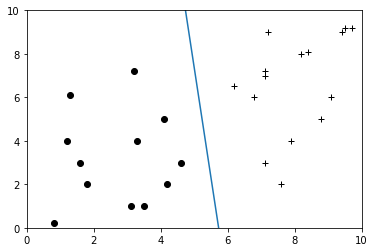

In [ ]:
with torch.no_grad():
  x = np.linspace(0,10,100)
  y = - ((model.weight[0,0] * x + model.bias))/model.weight[0,1]
plt.plot(x,y)
plt.plot(pointsA[:,0], pointsA[:,1], 'o', color='black');
plt.plot(pointsB[:,0], pointsB[:,1], '+', color='black');
plt.ylim(0,10)
plt.xlim(0,10)